# CSC4020 Homework 4 Programming 
### @117020119 Jiang  Jingxin 
## Missing Data Problem

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
from tqdm import tqdm

## 0. Complete Dataset 

In [2]:
n = 3000
d = 10

In [3]:
mu = np.array([0,1,2,4,8,10,20,50,80,100])
sigma = np.array([[10,  4,  8,  4, 10,  4,  4,  0,  6,  8],
                  [ 4,  6,  2,  4,  6,  4,  4,  2,  2,  4],
                  [ 8,  2, 10,  4, 10,  6,  2,  0,  4,  8],
                  [ 4,  4,  4,  8,  6,  8,  4,  4,  2,  6],
                  [10,  6, 10,  6, 18, 10,  8,  4,  8, 12],
                  [ 4,  4,  6,  8, 10, 12,  6,  6,  4,  8],
                  [ 4,  4,  2,  4,  8,  6,  8,  4,  6,  4],
                  [ 0,  2,  0,  4,  4,  6,  4,  6,  2,  2],
                  [ 6,  2,  4,  2,  8,  4,  6,  2,  8,  4],
                  [ 8,  4,  8,  6, 12,  8,  4,  2,  4, 14]])

In [4]:
np.random.seed(42)
data_complete = np.random.multivariate_normal(mu, sigma, 3000)

## 1. EM Algorithm

In [37]:
class EMalgo:
    def __init__(self):
        pass
    
    def _EM(self):
        mu = np.zeros(self.d) 
        sigma = np.zeros([self.d,self.d])

        for i, row in enumerate(self.data):
            u = self._missing[i,:]
            o = ~u
            x = row[o]
            v = self._sigma[u,:][:,u]-self._sigma[u,:][:,o]@np.linalg.pinv(self._sigma[o,:][:,o])@self._sigma[o,:][:,u]
            m = self._mu[u]+self._sigma[u,:][:,o]@np.linalg.inv(self._sigma[o,:][:,o])@(x-self._mu[o])
            
            Ex = np.zeros(self.d) 
            Ex[u] = m
            Ex[o] = x
            
            Exx =np.zeros([self.d,self.d])
            Exx[np.outer(u,u)] = (np.outer(m,m)+v).flatten()
            Exx[np.outer(o,o)] = np.outer(x,x).flatten()
            Exx[np.outer(o,u)] = np.outer(x,m).flatten()
            Exx[np.outer(u,o)] = np.outer(m,x).flatten()
            
            mu += Ex
            sigma += Exx
            
        mu = mu/self.n
        sigma = sigma/self.n-np.outer(mu,mu)
        return mu, sigma
                        
    def fit(self,data,maxiter = 1000,delta=1e-05):
        from tqdm import tqdm
        from IPython.display import display, clear_output
        self.data = data
        self.n, self.d = data.shape
        self._missing = np.isnan(data)
        complete = data[~self._missing.any(axis=1)]
        if (len(complete)>0):
            self._mu = np.mean(complete,axis=0)
            self._sigma = np.cov(complete.T)
        else:
            filled = np.nan_to_num(data)+self._missing*np.random.standard_normal(data.shape)
            self._mu = np.mean(filled,axis=0)
            self._sigma = np.cov(filled.T)
        
        for i in range(maxiter):
            mu, sigma = self._EM()
            error_mu = norm(mu-self._mu)/norm(mu)
            error_sigma = norm(sigma-self._sigma)/norm(sigma)
            if (error_mu < delta) and (error_sigma < delta):
                print("iters:",i,"error_mu:",error_mu,"error_sigma:",error_sigma)
                return error_mu,error_sigma
            self._mu = mu
            self._sigma = sigma

## 2. Experiment

### 2.1 Missing Percentage = 0.4

In [8]:
p = 0.4
errors_1 = np.zeros([10,2])
for i in tqdm(range(10)):
    np.random.seed(i)
    data_missing = data_complete.flatten()
    data_missing[np.random.choice(n*d,int(n*d*p))]=np.nan
    data_missing = data_missing.reshape(3000,10)
    em = EMalgo()
    em.fit(data_missing)
    errors_1[i] = [norm(em._mu-mu)/norm(mu),
                   norm(em._sigma-sigma)/norm(sigma)]

 10%|█         | 1/10 [00:38<05:48, 38.77s/it]

iters: 36 error_mu: 3.640315919039465e-07 error_sigma: 9.060808267696697e-06


 20%|██        | 2/10 [01:20<05:16, 39.62s/it]

iters: 41 error_mu: 3.4986670155535905e-07 error_sigma: 9.529439701690773e-06


 30%|███       | 3/10 [01:58<04:34, 39.24s/it]

iters: 39 error_mu: 5.060482578930686e-07 error_sigma: 9.689290789327931e-06


 40%|████      | 4/10 [02:45<04:08, 41.40s/it]

iters: 50 error_mu: 3.598751819178609e-07 error_sigma: 9.493131462099589e-06


 50%|█████     | 5/10 [03:23<03:21, 40.40s/it]

iters: 41 error_mu: 2.5991734063778293e-07 error_sigma: 9.348625339804081e-06


 60%|██████    | 6/10 [03:59<02:36, 39.20s/it]

iters: 40 error_mu: 4.705526102821601e-07 error_sigma: 9.648470698089334e-06


 70%|███████   | 7/10 [04:40<01:59, 39.73s/it]

iters: 42 error_mu: 3.828509291838099e-07 error_sigma: 9.591493560714903e-06


 80%|████████  | 8/10 [05:22<01:20, 40.32s/it]

iters: 42 error_mu: 2.2083792785599205e-07 error_sigma: 9.335492654287573e-06


 90%|█████████ | 9/10 [06:09<00:42, 42.46s/it]

iters: 47 error_mu: 3.557985660397522e-07 error_sigma: 9.6845272508968e-06


100%|██████████| 10/10 [06:59<00:00, 41.91s/it]

iters: 52 error_mu: 1.0987413942707271e-07 error_sigma: 9.938298440878376e-06


Mean of relative errors for mu and sigma:

In [9]:
np.mean(errors_1,axis=0)

array([0.00082065, 0.05704103])

Standard deviaton of relative errors for mu and sigma:

In [10]:
np.std(errors_1,axis=0)

array([0.0001107 , 0.00314384])

### 2.2 Missing Percentage = 0.3

In [11]:
p = 0.3
errors_2 = np.zeros([10,2])
for i in tqdm(range(10)):
    np.random.seed(i)
    data_missing = data_complete.flatten()
    data_missing[np.random.choice(n*d,int(n*d*p))]=np.nan
    data_missing = data_missing.reshape(3000,10)
    em = EMalgo()
    em.fit(data_missing)
    errors_2[i] = [norm(em._mu-mu)/norm(mu),
                   norm(em._sigma-sigma)/norm(sigma)]

 10%|█         | 1/10 [00:25<03:46, 25.17s/it]

iters: 23 error_mu: 7.675575856480842e-07 error_sigma: 9.27112748155055e-06


 20%|██        | 2/10 [00:48<03:15, 24.50s/it]

iters: 22 error_mu: 5.15732936352488e-07 error_sigma: 9.220586993710647e-06


 30%|███       | 3/10 [01:12<02:50, 24.42s/it]

iters: 23 error_mu: 3.167135995709506e-07 error_sigma: 9.351348390844278e-06


 40%|████      | 4/10 [01:35<02:23, 23.91s/it]

iters: 21 error_mu: 6.27737926695363e-07 error_sigma: 8.239615452044519e-06


 50%|█████     | 5/10 [01:58<01:58, 23.75s/it]

iters: 23 error_mu: 7.752765415915142e-08 error_sigma: 9.834125658957431e-06


 60%|██████    | 6/10 [02:29<01:44, 26.08s/it]

iters: 30 error_mu: 2.1536035714073477e-08 error_sigma: 9.114888136518008e-06


 70%|███████   | 7/10 [03:02<01:24, 28.08s/it]

iters: 30 error_mu: 6.073355363666473e-08 error_sigma: 9.15841382765311e-06


 80%|████████  | 8/10 [03:28<00:54, 27.36s/it]

iters: 24 error_mu: 9.800317265044921e-08 error_sigma: 9.145360605064797e-06


 90%|█████████ | 9/10 [03:54<00:27, 27.06s/it]

iters: 26 error_mu: 2.1126476925261428e-07 error_sigma: 9.896601543103648e-06


100%|██████████| 10/10 [04:18<00:00, 25.84s/it]

iters: 23 error_mu: 9.06198360024603e-08 error_sigma: 9.56313120395823e-06


Mean of relative errors for mu and sigma:

In [12]:
np.mean(errors_2,axis=0)

array([0.00078913, 0.05556101])

Standard deviaton of relative errors for mu and sigma:

In [13]:
np.std(errors_2,axis=0)

array([0.00010946, 0.00354356])

### 2.3 Missing Percentage = 0.2

In [14]:
p = 0.2
errors_3 = np.zeros([10,2])
for i in tqdm(range(10)):
    np.random.seed(i)
    data_missing = data_complete.flatten()
    data_missing[np.random.choice(n*d,int(n*d*p))]=np.nan
    data_missing = data_missing.reshape(3000,10)
    em = EMalgo()
    em.fit(data_missing)
    errors_3[i] = [norm(em._mu-mu)/norm(mu),
                   norm(em._sigma-sigma)/norm(sigma)]

 10%|█         | 1/10 [00:12<01:51, 12.42s/it]

iters: 11 error_mu: 5.670971907698353e-07 error_sigma: 9.258974628187916e-06


 20%|██        | 2/10 [00:28<01:49, 13.65s/it]

iters: 13 error_mu: 2.001840477884286e-07 error_sigma: 8.021381015403547e-06


 30%|███       | 3/10 [00:44<01:38, 14.11s/it]

iters: 12 error_mu: 7.922352874520702e-08 error_sigma: 9.897756622414724e-06


 40%|████      | 4/10 [00:57<01:23, 13.96s/it]

iters: 12 error_mu: 3.946350011699897e-08 error_sigma: 8.291863994035686e-06


 50%|█████     | 5/10 [01:08<01:05, 13.10s/it]

iters: 10 error_mu: 3.972554122787903e-07 error_sigma: 9.673664162793171e-06


 60%|██████    | 6/10 [01:24<00:55, 13.91s/it]

iters: 15 error_mu: 9.606800061286919e-08 error_sigma: 7.852820038777334e-06


 70%|███████   | 7/10 [01:39<00:42, 14.06s/it]

iters: 14 error_mu: 1.4202127390952366e-07 error_sigma: 8.068087605161223e-06


 80%|████████  | 8/10 [01:51<00:27, 13.67s/it]

iters: 12 error_mu: 2.9953798406114814e-07 error_sigma: 7.97098724337098e-06


 90%|█████████ | 9/10 [02:06<00:14, 14.01s/it]

iters: 14 error_mu: 1.924511795024197e-07 error_sigma: 8.539393139697052e-06


100%|██████████| 10/10 [02:20<00:00, 14.07s/it]

iters: 12 error_mu: 1.9463487799237215e-07 error_sigma: 8.538694911525374e-06


Mean of relative errors for mu and sigma:

In [15]:
np.mean(abs(errors_3),axis=0)

array([0.00075147, 0.05388891])

Standard deviaton of relative errors for mu and sigma:

In [16]:
np.std(errors_3,axis=0)

array([5.59634957e-05, 2.50730301e-03])

### 2.4 Missing Percentage = 0.1

In [17]:
p = 0.1
errors_4 = np.zeros([10,2])
for i in tqdm(range(10)):
    np.random.seed(i)
    data_missing = data_complete.flatten()
    data_missing[np.random.choice(n*d,int(n*d*p))]=np.nan
    data_missing = data_missing.reshape(3000,10)
    em = EMalgo()
    em.fit(data_missing)
    errors_4[i] = [norm(em._mu-mu)/norm(mu),
                   norm(em._sigma-sigma)/norm(sigma)]

 10%|█         | 1/10 [00:07<01:09,  7.73s/it]

iters: 6 error_mu: 1.368886651415144e-07 error_sigma: 5.290474603031804e-06


 20%|██        | 2/10 [00:14<00:59,  7.41s/it]

iters: 6 error_mu: 2.469319366367871e-07 error_sigma: 6.012402580168153e-06


 30%|███       | 3/10 [00:21<00:52,  7.46s/it]

iters: 6 error_mu: 2.907888996910723e-08 error_sigma: 5.334128347374957e-06


 40%|████      | 4/10 [00:27<00:41,  6.89s/it]

iters: 5 error_mu: 2.7393456853690556e-07 error_sigma: 8.836870747351823e-06


 50%|█████     | 5/10 [00:33<00:33,  6.69s/it]

iters: 5 error_mu: 7.294694356987802e-07 error_sigma: 7.057057842278393e-06


 60%|██████    | 6/10 [00:42<00:28,  7.18s/it]

iters: 7 error_mu: 6.71738247518029e-08 error_sigma: 4.607691774316012e-06


 70%|███████   | 7/10 [00:49<00:21,  7.11s/it]

iters: 6 error_mu: 1.1615226499092396e-07 error_sigma: 6.887163925876548e-06


 80%|████████  | 8/10 [00:56<00:14,  7.25s/it]

iters: 7 error_mu: 3.6769084546937866e-08 error_sigma: 5.971284918809178e-06


 90%|█████████ | 9/10 [01:04<00:07,  7.40s/it]

iters: 7 error_mu: 7.892981451171109e-08 error_sigma: 5.321436227441244e-06


100%|██████████| 10/10 [01:10<00:00,  7.08s/it]

iters: 5 error_mu: 4.886694717143275e-07 error_sigma: 8.53507212537467e-06


Mean of relative errors for mu and sigma:

In [18]:
np.mean(errors_4,axis=0)

array([0.00069346, 0.0543418 ])

Standard deviaton of relative errors for mu and sigma:

In [19]:
np.std(errors_4,axis=0)

array([3.92619434e-05, 1.79644689e-03])

### 2.5 Missing Percentage = 0.05

In [20]:
p = 0.05
errors_5 = np.zeros([10,2])
for i in tqdm(range(10)):
    np.random.seed(i)
    data_missing = data_complete.flatten()
    data_missing[np.random.choice(n*d,int(n*d*p))]=np.nan
    data_missing = data_missing.reshape(3000,10)
    em = EMalgo()
    em.fit(data_missing)
    errors_5[i] = [norm(em._mu-mu)/norm(mu),
                   norm(em._sigma-sigma)/norm(sigma)]

 10%|█         | 1/10 [00:04<00:37,  4.14s/it]

iters: 3 error_mu: 1.8378317779895777e-07 error_sigma: 8.592029913896554e-06


 20%|██        | 2/10 [00:09<00:35,  4.40s/it]

iters: 4 error_mu: 1.536298353034614e-07 error_sigma: 3.1188569682007045e-06


 30%|███       | 3/10 [00:13<00:30,  4.36s/it]

iters: 3 error_mu: 3.3312370789669116e-07 error_sigma: 7.15605153297962e-06


 40%|████      | 4/10 [00:18<00:27,  4.64s/it]

iters: 4 error_mu: 6.084765690548946e-08 error_sigma: 3.068334789531943e-06


 50%|█████     | 5/10 [00:23<00:23,  4.73s/it]

iters: 4 error_mu: 8.347108136177117e-08 error_sigma: 3.3175774075004606e-06


 60%|██████    | 6/10 [00:28<00:19,  4.83s/it]

iters: 4 error_mu: 1.2364946655417403e-07 error_sigma: 3.74221525304771e-06


 70%|███████   | 7/10 [00:33<00:14,  4.91s/it]

iters: 4 error_mu: 4.087132234834519e-08 error_sigma: 4.8225076635723126e-06


 80%|████████  | 8/10 [00:38<00:09,  4.98s/it]

iters: 4 error_mu: 7.03767803911442e-08 error_sigma: 4.6140075432764285e-06


 90%|█████████ | 9/10 [00:43<00:04,  4.73s/it]

iters: 3 error_mu: 2.983339951099137e-07 error_sigma: 6.82302547193699e-06


100%|██████████| 10/10 [00:47<00:00,  4.71s/it]

iters: 3 error_mu: 2.1625385615962575e-07 error_sigma: 6.497366647544994e-06


Mean of relative errors for mu and sigma:

In [21]:
np.mean(errors_5,axis=0)

array([0.00068113, 0.05320922])

Standard deviaton of relative errors for mu and sigma:

In [22]:
np.std(errors_5,axis=0)

array([1.84617223e-05, 1.21177838e-03])

## 3. Analysis

### 3.1 Vertical Bar Plot

In [24]:
missing_percentage = [0.4, 0.3, 0.2, 0.1, 0.05]
mu_mean = [np.mean(errors_1,axis=0)[0],
           np.mean(errors_2,axis=0)[0],
           np.mean(errors_3,axis=0)[0],
           np.mean(errors_4,axis=0)[0],
           np.mean(errors_5,axis=0)[0]]
mu_std = [np.std(errors_1,axis=0)[0],
          np.std(errors_2,axis=0)[0],
          np.std(errors_3,axis=0)[0],
          np.std(errors_4,axis=0)[0],
          np.std(errors_5,axis=0)[0]]
sigma_mean = [np.mean(errors_1,axis=0)[1],
              np.mean(errors_2,axis=0)[1],
              np.mean(errors_3,axis=0)[1],
              np.mean(errors_4,axis=0)[1],
              np.mean(errors_5,axis=0)[1]]
sigma_std = [np.std(errors_1,axis=0)[1],
             np.std(errors_2,axis=0)[1],
             np.std(errors_3,axis=0)[1],
             np.std(errors_4,axis=0)[1],
             np.std(errors_5,axis=0)[1]]

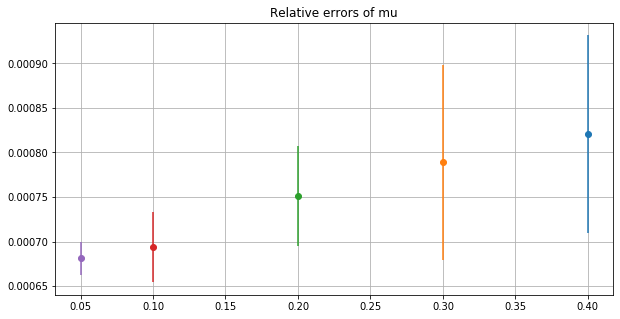

In [34]:
fig = plt.figure(figsize=(10,5))
for i in range(5):
    fig = plt.errorbar(x = missing_percentage[i], y = mu_mean[i], yerr = mu_std[i], fmt='o')
fig = plt.title('Relative errors of mu')
fig = plt.grid()    

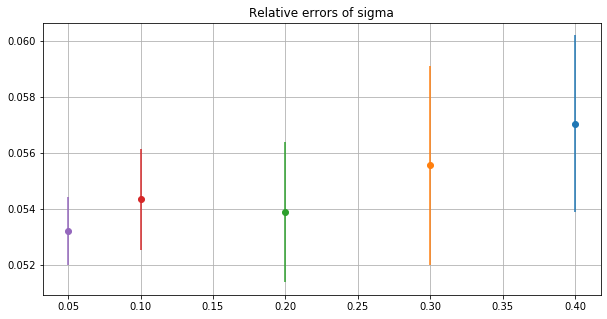

In [33]:
fig = plt.figure(figsize=(10,5))
for i in range(5):
    fig = plt.errorbar(x = missing_percentage[i], y = sigma_mean[i], yerr = sigma_std[i], fmt='o')
fig = plt.title('Relative errors of sigma')
fig = plt.grid()    

### 3.2 Summary

From the plot, it is clear that the mean and standard deviation of relative errors increases as the missing percentage increase. This is intuitive to explain, with fewer data missing, the estimator generated from EM algorithm is more accurate and is closer to the true parameters. 

Interestingly, the iteration steps needed to converge also decreases as the missing percenatage decreases. 

By comparing the plot of mu and sigma, we can find that the relative error of sigma is larger. This is because sigma has more parameters to estimate than mu.